# Iris Dataset


##Read dataset and check data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
iris = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/week4/assignment/Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_drop = iris.drop(columns = "Id")
iris_drop.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris_drop.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization

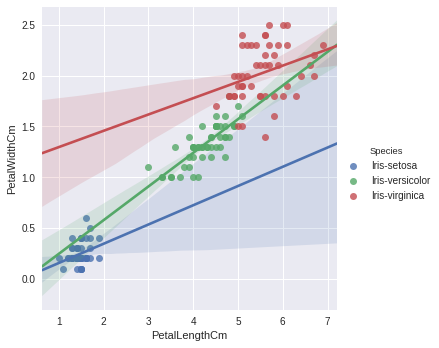

In [26]:
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=iris, hue='Species')


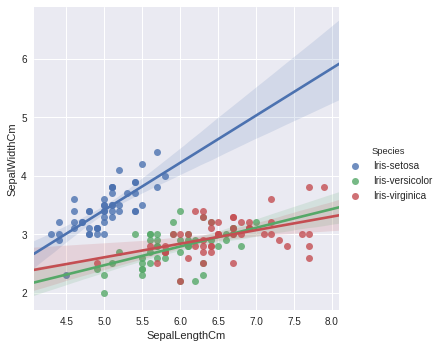

In [27]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=iris, hue='Species')


##Build Models

In [0]:
X= iris_drop.iloc[:, :-1].values
y= iris_drop.iloc[:, -1].values

In [0]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

###1. Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
prediction = model.predict(X_test)

In [16]:
confusion_matrix(y_test, prediction)

array([[13,  0,  0],
       [ 0, 18,  2],
       [ 0,  0, 12]])

In [17]:
report = classification_report(y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.90      0.95        20
 Iris-virginica       0.86      1.00      0.92        12

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [18]:
print(accuracy_score(y_test, prediction))


0.9555555555555556


### 2. Decison Tree and Random Forest

In [0]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [20]:
dtc = DecisionTreeClassifier(random_state=101)
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)

matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [21]:
print(accuracy_score(y_test, prediction))


0.9555555555555556


In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
report = classification_report(y_test, prediction)
print(matrix)
print(report)

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.85      0.92      0.88        12

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
print(accuracy_score(y_test, prediction))


0.9333333333333333
